## 9.6 Homework
- 1, dowoload the data from http://www-personal.umich.edu/~mejn/cp/data/circular.txt
- 2, using Fourier transform to process the image and figure out how to compress the data.
- 3, compare it with the size which you obtained via plt.savefig()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: ComplexWarning: Casting complex values to real discards the imaginary part
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: ComplexWarning: Casting complex values to real discards the imaginary part
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: ComplexWarning: Casting complex values to real discards the imaginary part


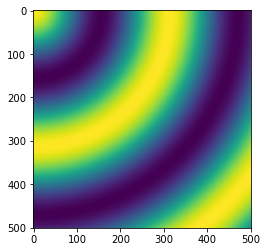

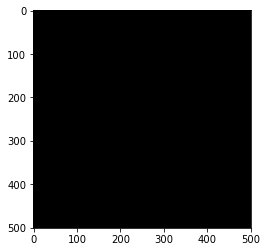

In [31]:
#import the stuff
import numpy as np
import pylab as pl

data = np.loadtxt("C:/Users/Blake/Downloads/cpresources/circular.txt",float)


# This defines a fft then compares it to a value.
# if that value is greater it is considered 0
# an inverse fft is the performed

def fft_comp(channel):
    epsilon = 5000
    channel = np.fft.fft(channel)
    channel[abs(channel) < epsilon] = 0
    channel = np.fft.ifft(channel)
    return channel

#This separates the color elements of the picture into arrays.

def RGB(data):
    x, y = data.shape
    red = data[..., 0].ravel()
    green = data[..., 1].ravel()
    blue = data[..., 2].ravel()
    return x, y, red, green, blue

#This takes the fft compression funciton from above and applies it to the arrays made from the color elemets.
#then it reshapes the arrays and forms an image from the array.
def compress_image(data):
    x, y, red, green, blue = RGB(data)

    red = fft_comp(red)
    green = fft_comp(green)
    blue = fft_comp(blue)

    result = np.zeros((x, y, 3), 'uint8')
    result[..., 0] = red.reshape((1, y,))
    result[..., 1] = green.reshape((1, y))
    result[..., 2] = blue.reshape((1, y))

    return Image.fromarray(result)

img = np.asarray(data)
im = compress_image(img)
    
#this plots the original and compressed image.

pl.imshow(data)
pl.show()

iimage = im
pl.imshow(iimage)
pl.show()


# I have not been able to figure out how to uncompress the image at this time, so this is where I'm going to leave it.
# I plan on returning to this when I have more free time.

## 10.4 Homework

Choose a particular application and perform fft analysis, and illustrate how fft helps.

This is also going to serve as my pick for the application of fft.

Without the ability to compress data, particularly images and sound files, data transfers would be particularly difficult.

Large file transfers that would be necessary without compression would clog bandwidth and slow down network interactions for functions like streaming. 

Not to mention that it takes more memory to store uncompressed data.
